# Multiple linear regression

With linear regression you design a linear model of the relationship between y, the dependent variable that you want to predict, and X, the independent variable that affects y. There is only one y variable and one or more X variables.

## Mashable data set

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Load data set
df = pd.read_csv("data Mashable.csv")

df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


## Finding correlations

Plotting a correlation matrix helps with finding interesting X variables to use in the predictive model of y shares_log, by looking at bigger positive or negative correlations. (The data set is too big to plot a scatter plot matrix at this point.)

In [3]:
# Correlation matrix
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


The seven variables below have the highest positive or negative correlation with shares_log:

* number of images
* entertainment channel
* socmed channel
* world channel; strongest (but weak) negative correlation
* weekend day; strongest (but weak) positive correlation
* text subjectivity
* title subjectivity

## Pre-processing and subsetting

In [4]:
# Make a subset of the seven variables
dfs = df[["shares_log", "num_imgs", "data_channel_is_entertainment", "data_channel_is_socmed",
          "data_channel_is_world", "is_weekend", "global_subjectivity", "title_subjectivity"]]

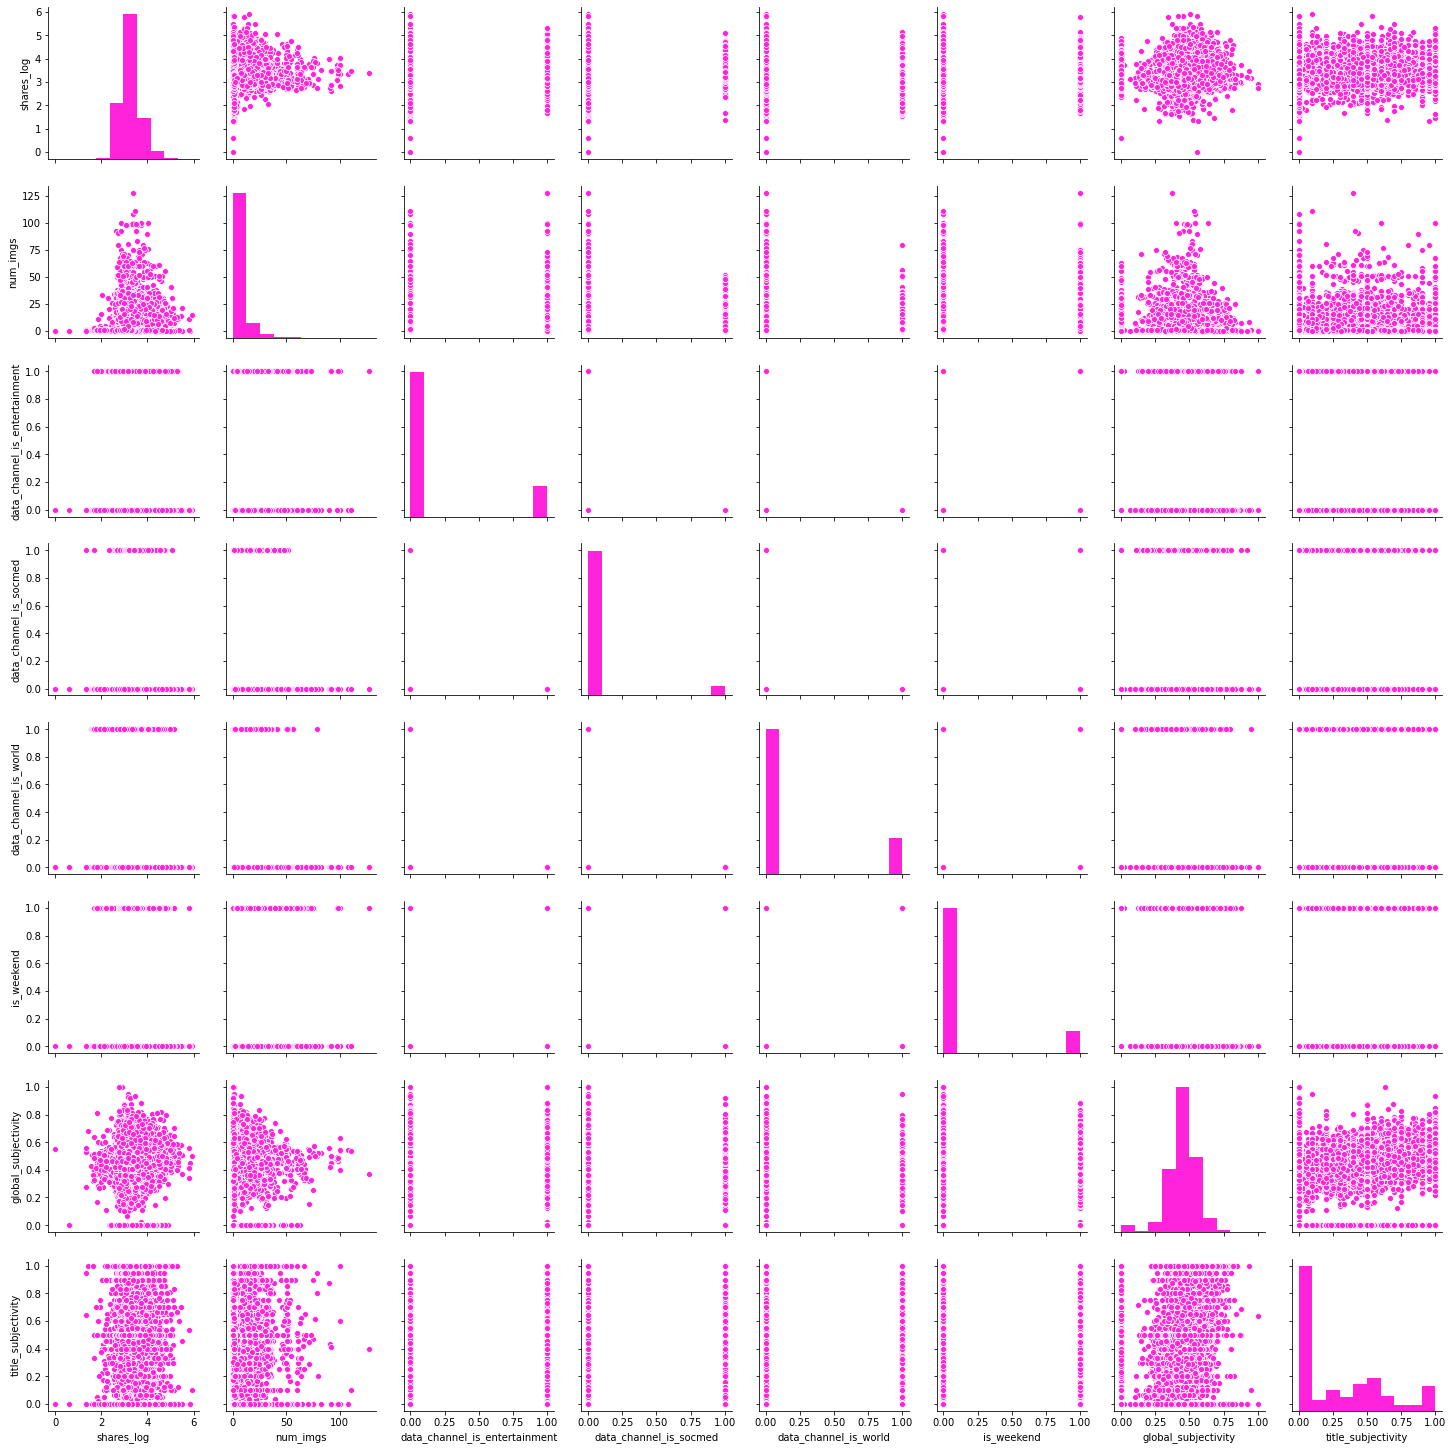

In [5]:
# Set palette for the plots
sns.set_palette(sns.color_palette("spring"))

# Scatter plot matrix
sns.pairplot(dfs)
plt.show()

Conclusions from the scatter plot matrix:

* data channels and weekend days are dummy variables; these plots don't tell us anything
* number of images, text subjectivity and title subjectivity have linear relationships with shares_log
* strangely, shares_log contains 0 values
* the same goes for text subjectivity
* number of images contains some extreme values

Let's remove the improbable outliers and see what the scatter plots look like after.

In [6]:
# Remove improbable outliers
df = df[df["shares_log"] > 0]
df = df[df["global_subjectivity"] > 0]
df = df[df["num_imgs"] < 100]

# Make the final subset
dfs_def = df[["shares_log", "num_imgs", "data_channel_is_entertainment", "data_channel_is_socmed",
          "data_channel_is_world", "is_weekend", "global_subjectivity", "title_subjectivity"]]

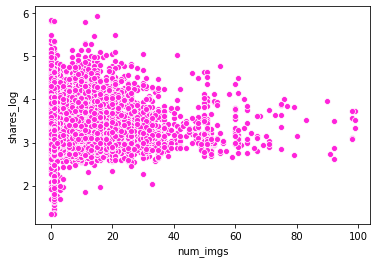

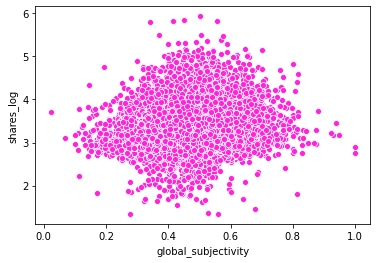

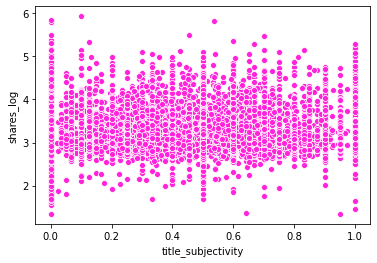

In [7]:
# Scatter plots
sns.scatterplot(x="num_imgs", y="shares_log", data=dfs_def)
plt.ylabel("shares_log")
plt.xlabel("num_imgs")
plt.show()

sns.scatterplot(x="global_subjectivity", y="shares_log", data=dfs_def)
plt.ylabel("shares_log")
plt.xlabel("global_subjectivity")
plt.show()

sns.scatterplot(x="title_subjectivity", y="shares_log", data=dfs_def)
plt.ylabel("shares_log")
plt.xlabel("title_subjectivity")
plt.show()

All three variables have a linear relationship with shares_log, but none of them are clearly visible. As the number of images increases, there seems to be a slight increase in shares_log.

## The multiple linear regression model

In [8]:
# Create separate X and y
y = dfs_def["shares_log"]
X = dfs_def.loc[:,"num_imgs":"title_subjectivity"]

X.head()

,num_imgs,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_world,is_weekend,global_subjectivity,title_subjectivity
0,12,0,0,0,0,0.439379,0.666667
1,6,0,0,1,0,0.300454,0.000000
2,0,0,0,0,0,0.575486,0.000000
3,2,0,0,0,0,0.327220,0.000000
4,18,0,0,0,0,0.507709,0.000000


#### Test and train set

In [9]:
# Randomly split the data into a 70% train set and a 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

,num_imgs,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_world,is_weekend,global_subjectivity,title_subjectivity
4327,0,0,0,0,0,0.384077,0.200000
2905,1,0,0,0,0,0.420268,0.200000
24065,1,1,0,0,0,0.463088,0.366667
10263,1,0,0,0,0,0.364935,0.227273
18826,3,0,0,0,0,0.523793,0.000000


#### Creating a linear model

In [10]:
# Create linear model
lm = LinearRegression()

# Train linear model
model = lm.fit(X_train, y_train)

#### Coefficients

In [11]:
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
0.003020,num_imgs
-0.131324,data_channel_is_entertainment
0.094289,data_channel_is_socmed
-0.135717,data_channel_is_world
0.120736,is_weekend
0.451985,global_subjectivity
0.032379,title_subjectivity


Interpreting the coefficients:

* For each image, shares_log increases with 0.003
* The entertainment channel is unpopular and decreases shares_log by -0.13
* The socmed channel is popular and increases shares_log by 0.10
* The world channel is unpopular and decreases shares_log by -0.13
* If the article comes out on the weekend, shares_log increases by 0.12
* If the subjectivity of the text increases, shares_log increases by 0.40
* If the subjectivity of the title increases, shares_log increases by 0.03

#### Model formula

In [12]:
# Get the intercept
b0 = lm.intercept_

print(f"The intercept = {b0:.3f}")

The intercept = 3.051


$y = 3.051 + 0.003X + -0.131X + 0.094X + -0.135 + 0.120X + 0.451X + 0.032X + e$

## Model performance

In [13]:
# Use X_test to calculate R^2
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.06007381438159087

The $R^2$ is 0.06, meaning just 6% of the variation in shares_log is explained by the model.

In [14]:
# Calculate RMSE
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39924217735683803

The Root Mean Squared Error is 0.39. Meaning the model is typically around 0.39 off when predicting shares_log.

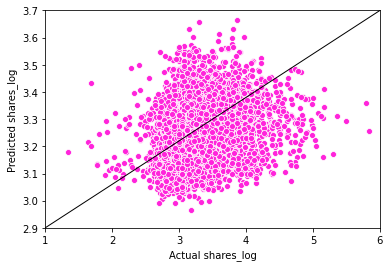

In [15]:
# Scatter plot
sns.scatterplot(y_test, y_test_p)
plt.xlabel("Actual shares_log")
plt.ylabel("Predicted shares_log")
plt.xlim([1,6])
plt.ylim([2.9,3.7])
plt.plot([1,6], [2.9,3.7], color="black", lw=1)
plt.show()

Most of the points are not on the black line (the perfect model). For lower shares_log, the model _overshoots_. For higher shares_log, the majority of the data, the model _undershoots_.